#Importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import statistics as stat
from statsmodels.tools.tools import add_constant
from sklearn.metrics import r2_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/CleanData.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OverallQual     1855 non-null   int64  
 1   GrLivArea       1855 non-null   int64  
 2   TotalBath       1855 non-null   int64  
 3   GarageCars      1855 non-null   int64  
 4   GarageArea      1855 non-null   int64  
 5   TotalBsmtSF     1855 non-null   int64  
 6   KitchenQual     1855 non-null   int64  
 7   TotRmsAbvGrd    1855 non-null   int64  
 8   HouseAge1       1855 non-null   int64  
 9   SubClass        1855 non-null   int64  
 10  LotFrontage     1855 non-null   float64
 11  WeatherControl  1855 non-null   int64  
 12  Functional      1855 non-null   object 
 13  Electrical      1855 non-null   object 
 14  LotShape        1855 non-null   object 
 15  Zoning          1855 non-null   object 
 16  ExterQual       1855 non-null   object 
 17  Neighborhood    1855 non-null   o

#Visualize Numerical Variables

In [ ]:
numerical_data = data.select_dtypes("number")
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OverallQual     1855 non-null   int64  
 1   GrLivArea       1855 non-null   int64  
 2   TotalBath       1855 non-null   int64  
 3   GarageCars      1855 non-null   int64  
 4   GarageArea      1855 non-null   int64  
 5   TotalBsmtSF     1855 non-null   int64  
 6   KitchenQual     1855 non-null   int64  
 7   TotRmsAbvGrd    1855 non-null   int64  
 8   HouseAge1       1855 non-null   int64  
 9   SubClass        1855 non-null   int64  
 10  LotFrontage     1855 non-null   float64
 11  WeatherControl  1855 non-null   int64  
 12  LogSalePrice    1855 non-null   float64
 13  SalePrice       1855 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 203.0 KB


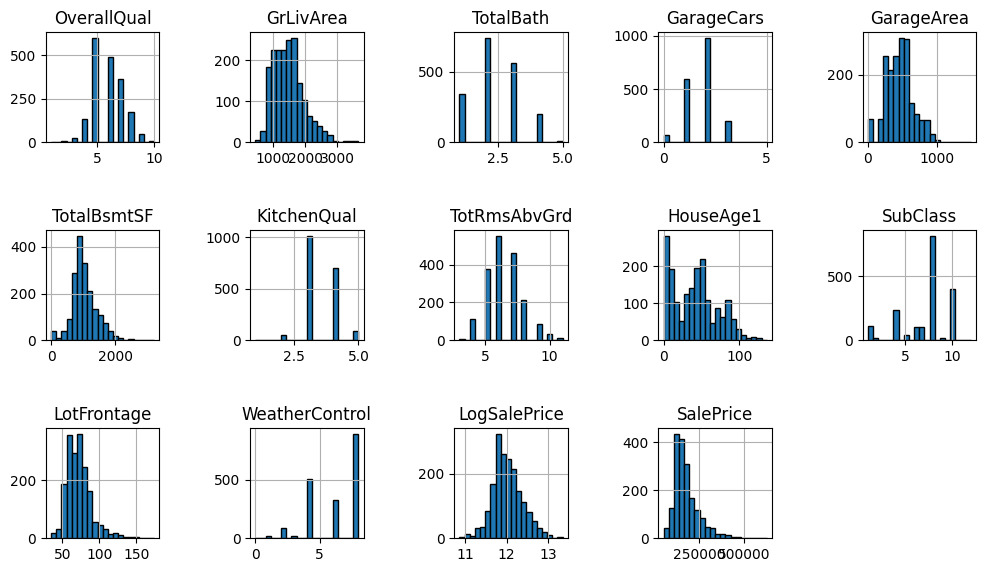

In [ ]:
numerical_data.hist(
    bins=20, figsize=(12, 22), edgecolor="black", layout=(9, 5)
)
plt.subplots_adjust(hspace=0.8, wspace=0.8)

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns.tolist()

['OverallQual',
 'GrLivArea',
 'TotalBath',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'KitchenQual',
 'TotRmsAbvGrd',
 'HouseAge1',
 'SubClass',
 'LotFrontage',
 'WeatherControl',
 'LogSalePrice',
 'SalePrice']

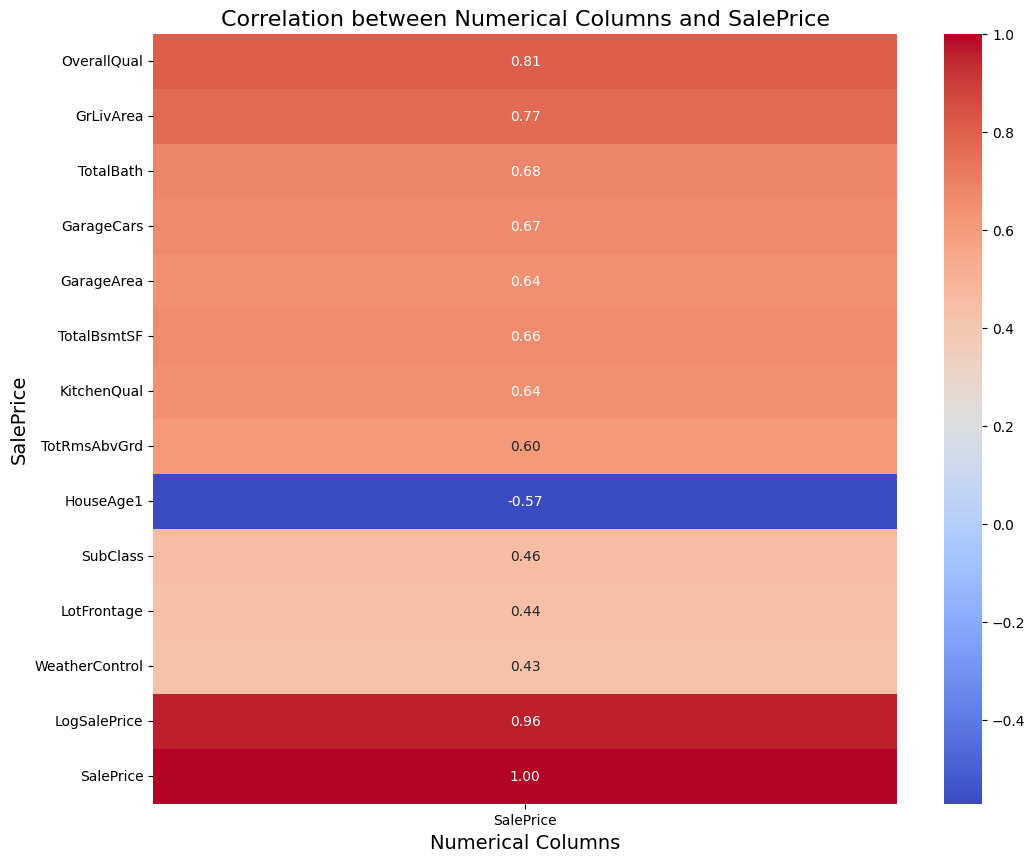

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numerical Columns and SalePrice', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.show()


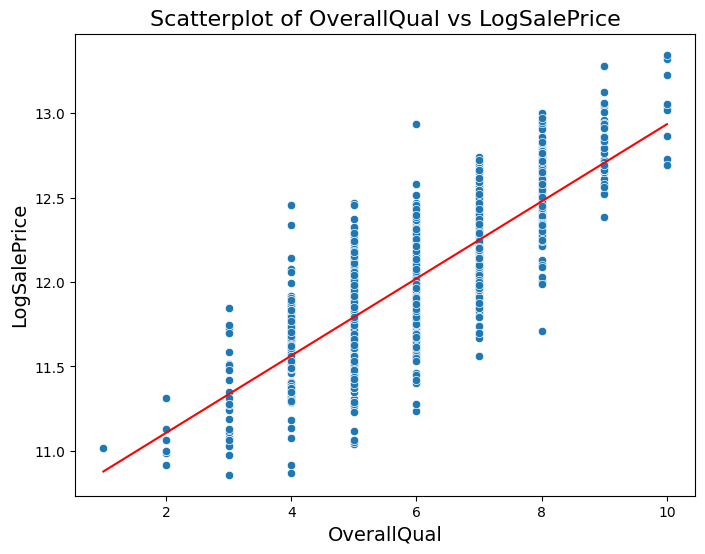

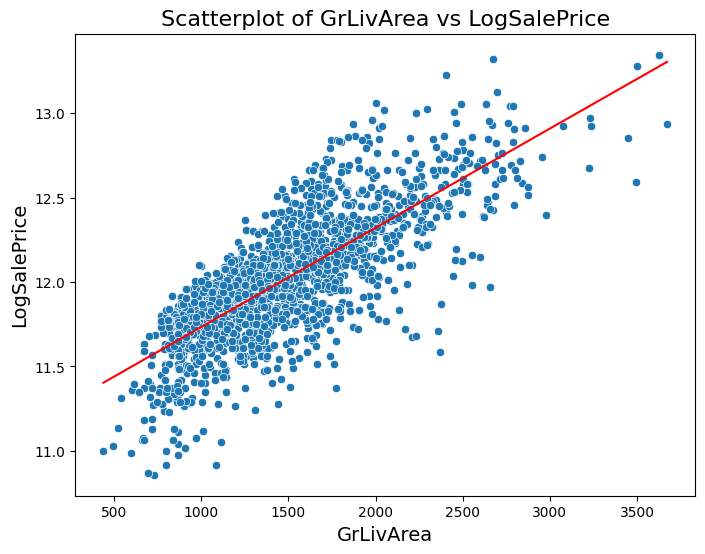

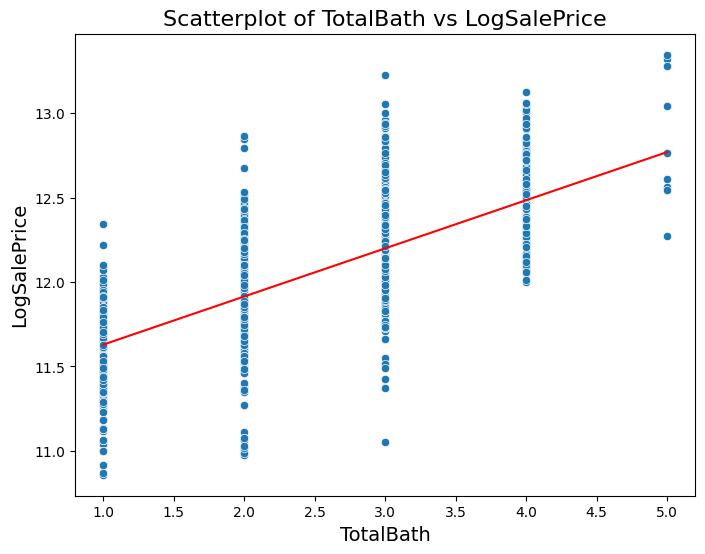

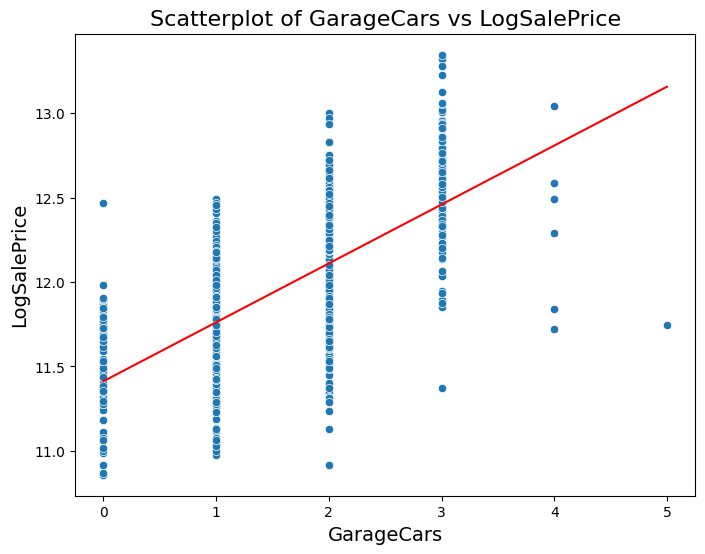

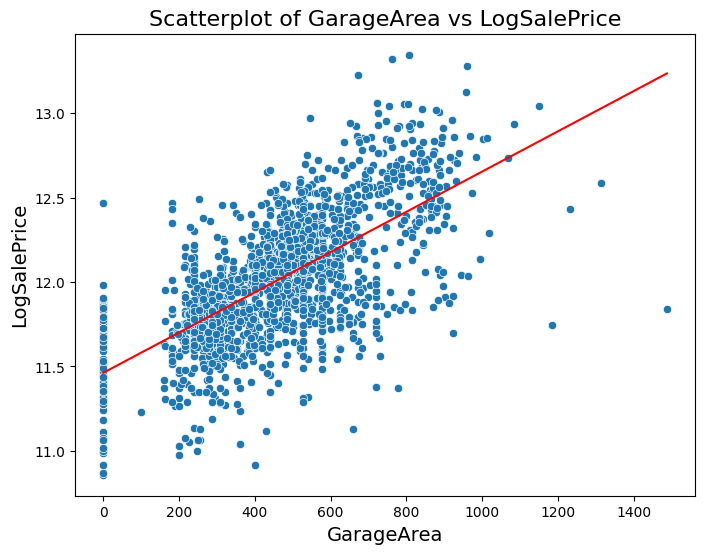

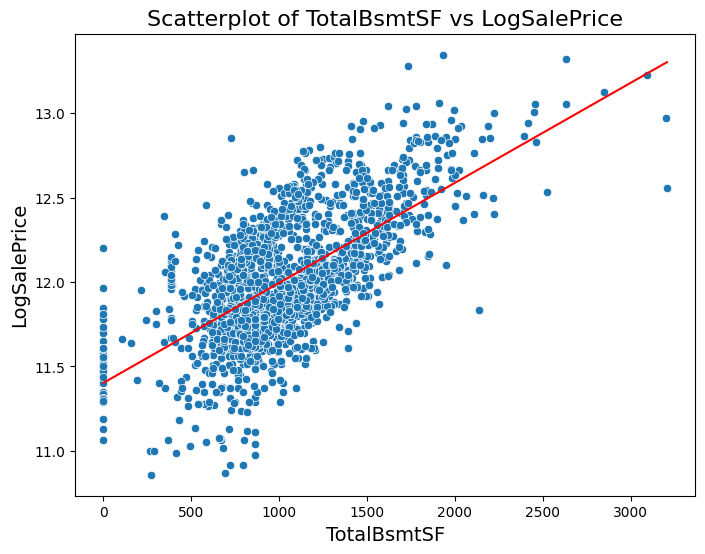

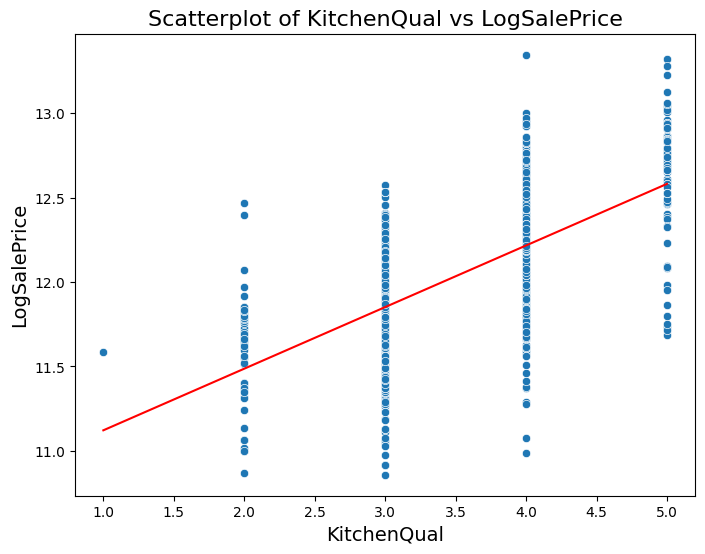

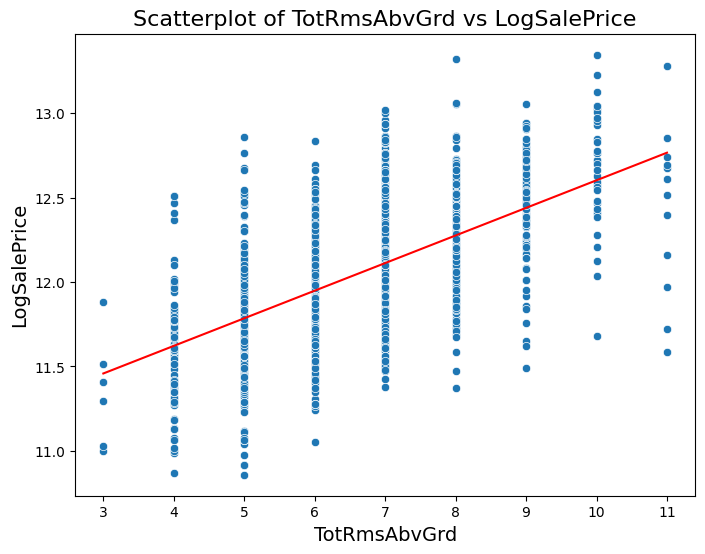

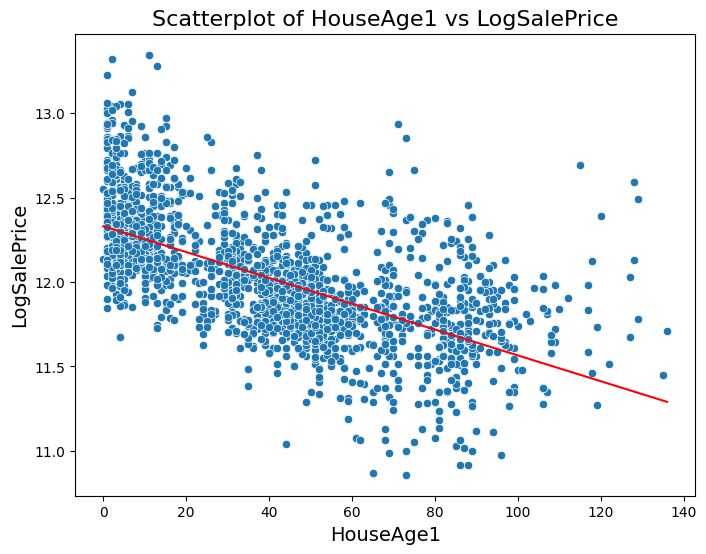

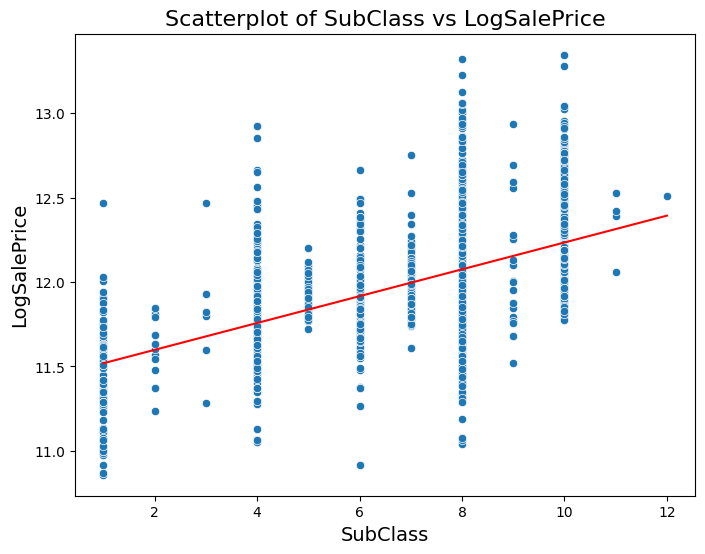

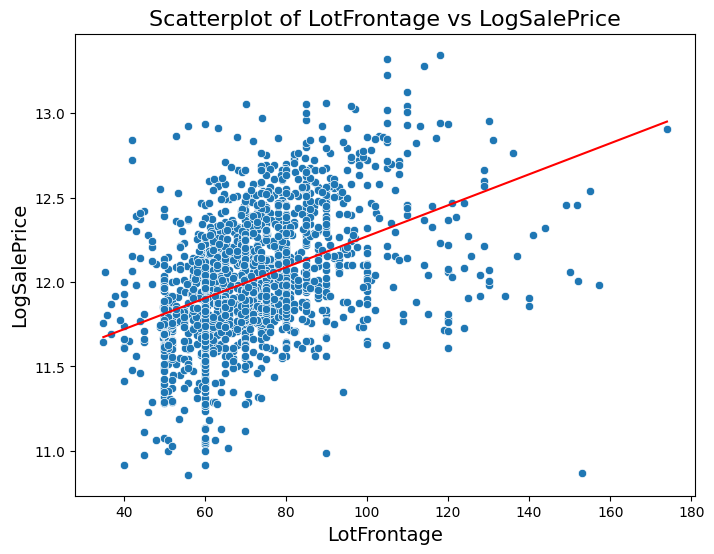

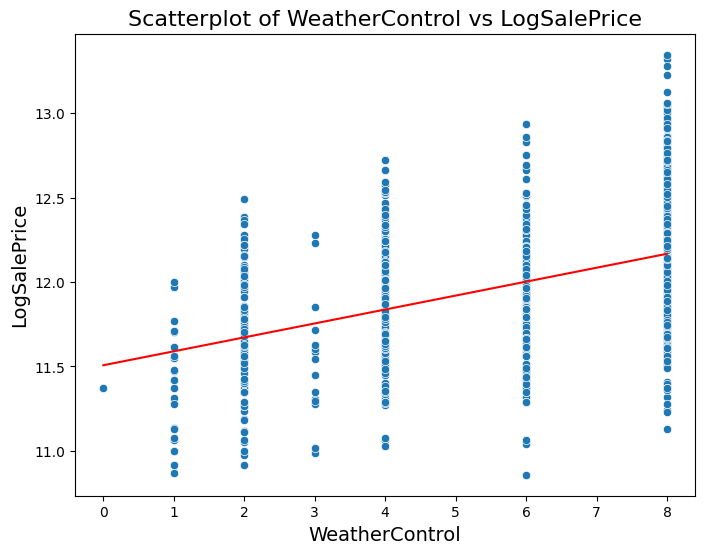

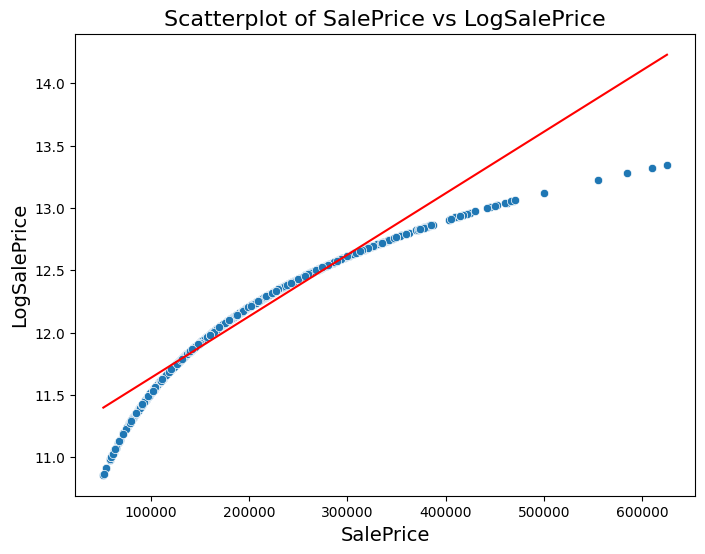

In [ ]:
# Plot scatterplot for each numerical column against 'SalePrice'
for column in numerical_columns:
    if column != 'LogSalePrice':  # Exclude SalePrice itself

        x = data[column]
        y = data['LogSalePrice']
        coff = np.polyfit(x,y,1)
        poly = np.poly1d(coff)

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[column], y=data['LogSalePrice'])
        plt.plot(np.sort(x), poly(np.sort(x)), color = 'red')

        plt.title(f'Scatterplot of {column} vs LogSalePrice', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('LogSalePrice', fontsize=14)
        plt.show()

#Visualize Categorical Variables


In [ ]:
string_data = data.select_dtypes(object)
string_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Functional    1855 non-null   object
 1   Electrical    1855 non-null   object
 2   LotShape      1855 non-null   object
 3   Zoning        1855 non-null   object
 4   ExterQual     1855 non-null   object
 5   Neighborhood  1855 non-null   object
dtypes: object(6)
memory usage: 87.1+ KB


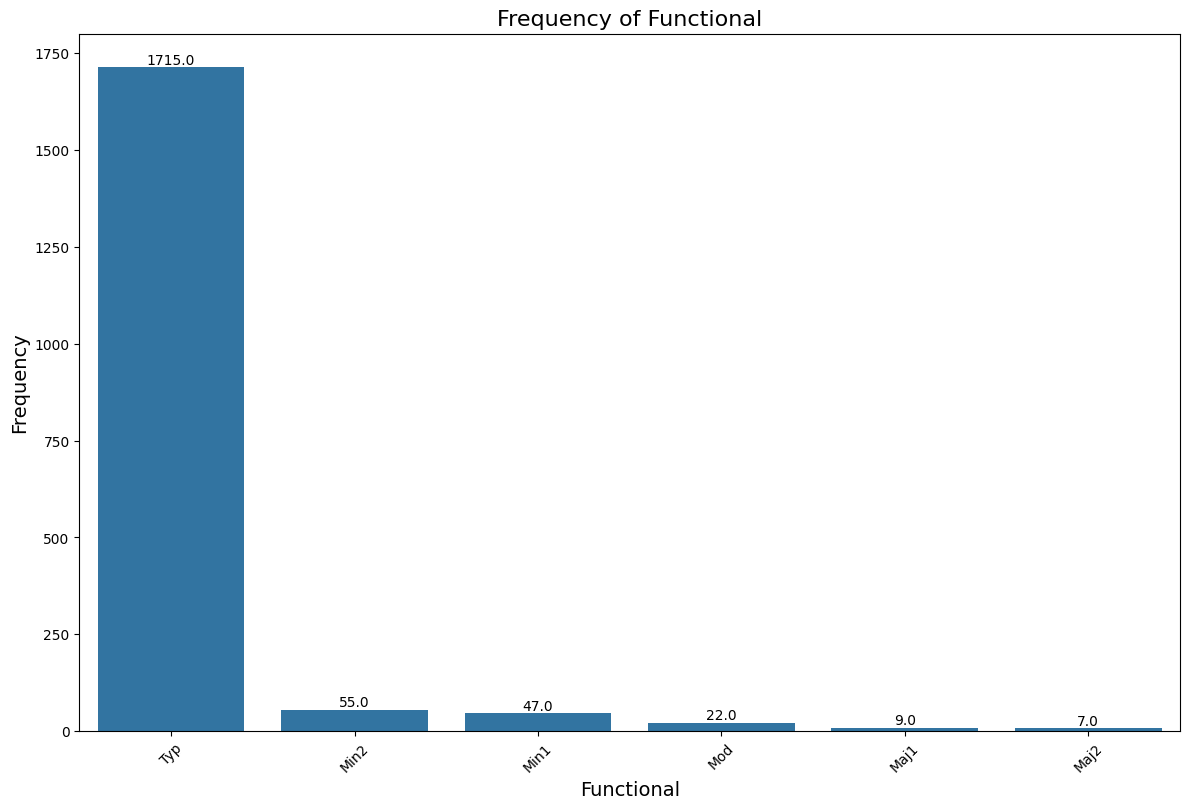

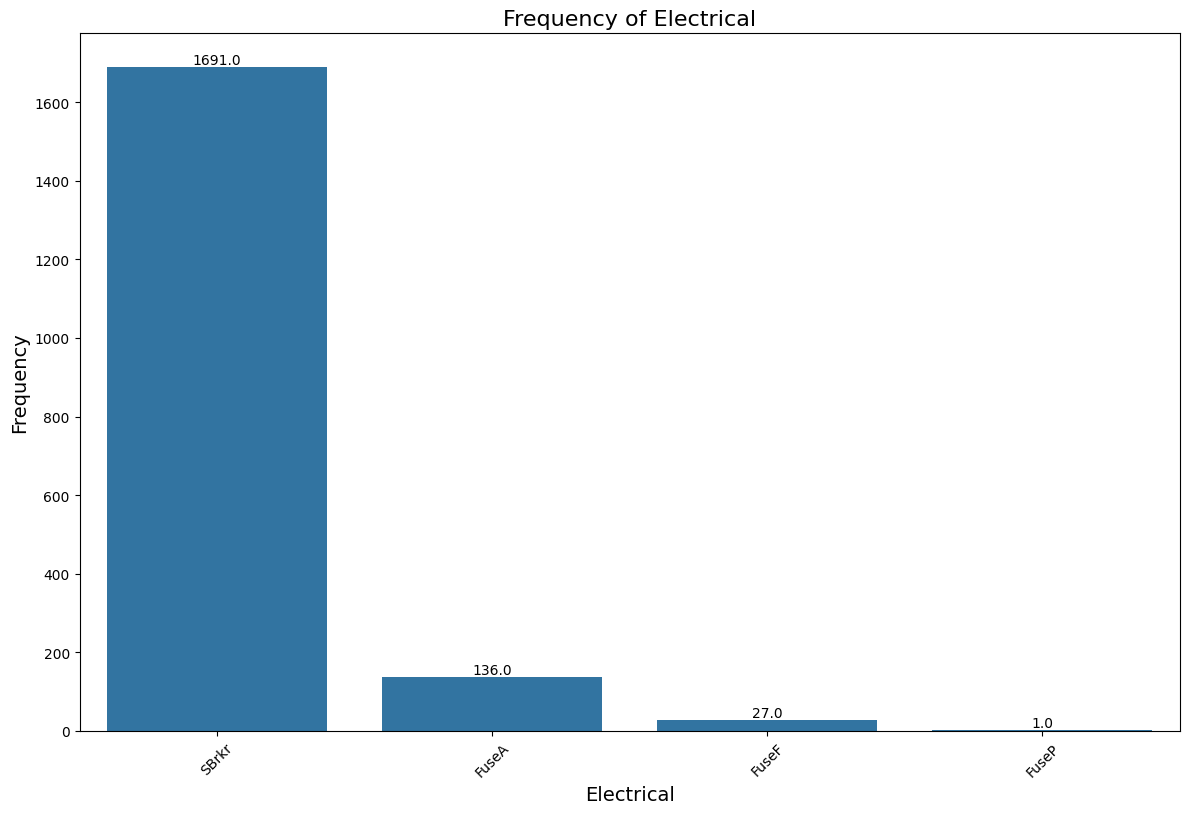

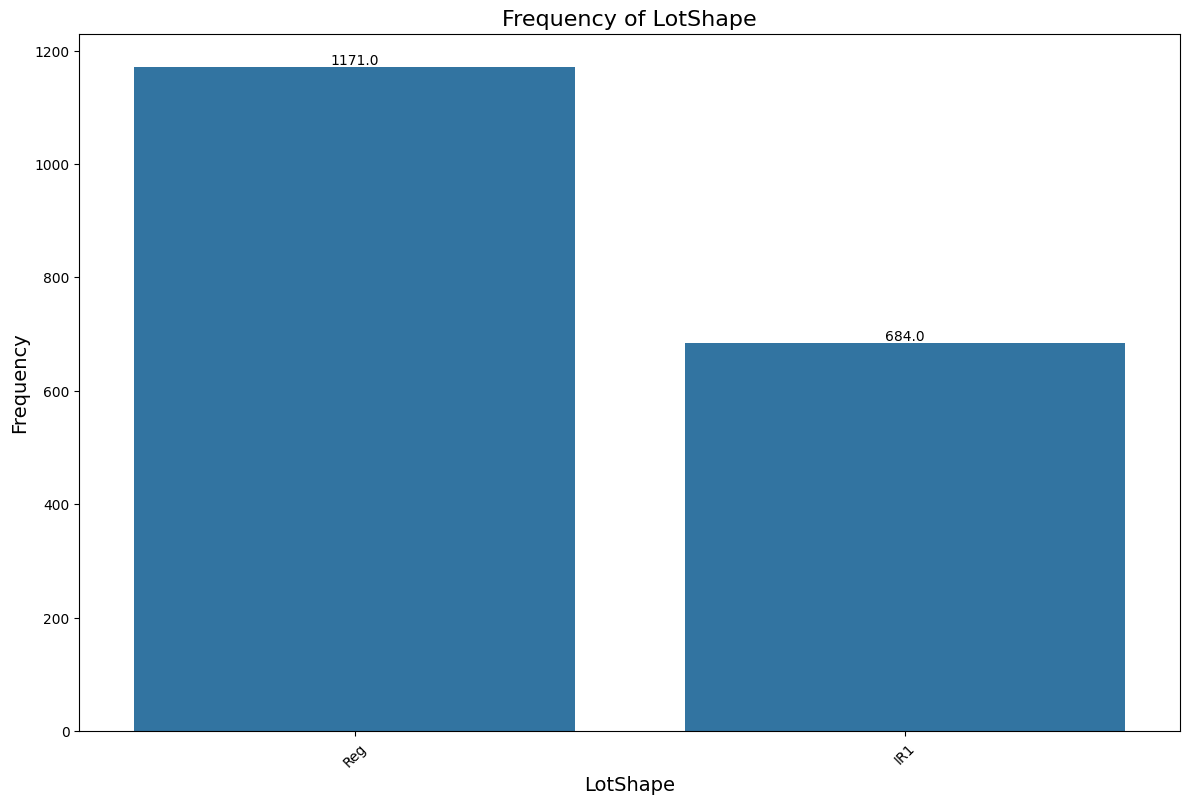

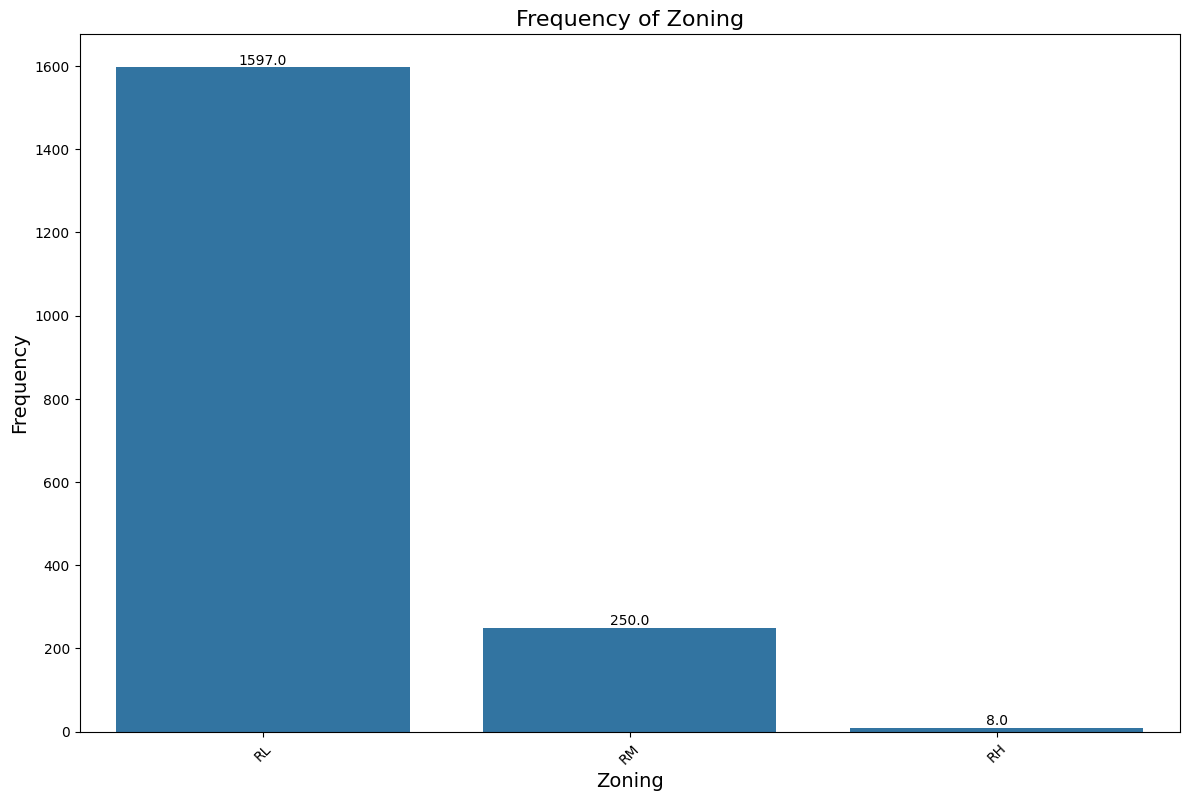

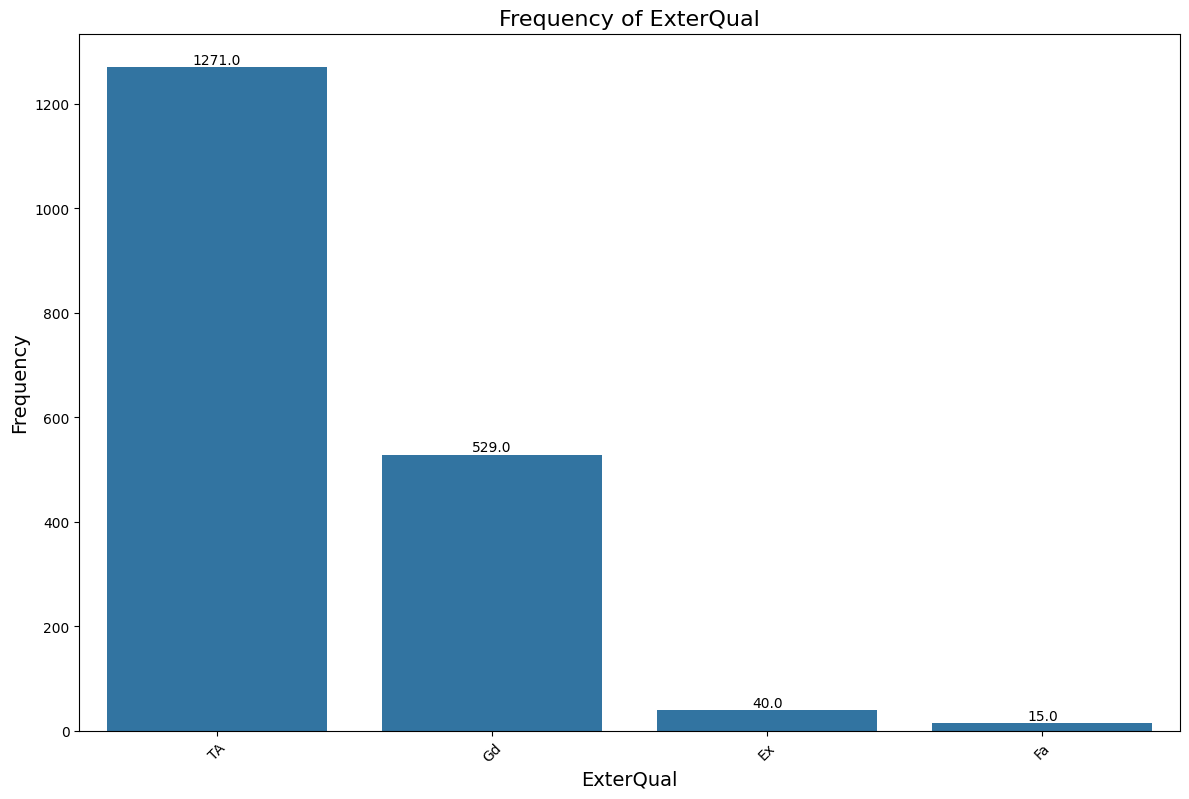

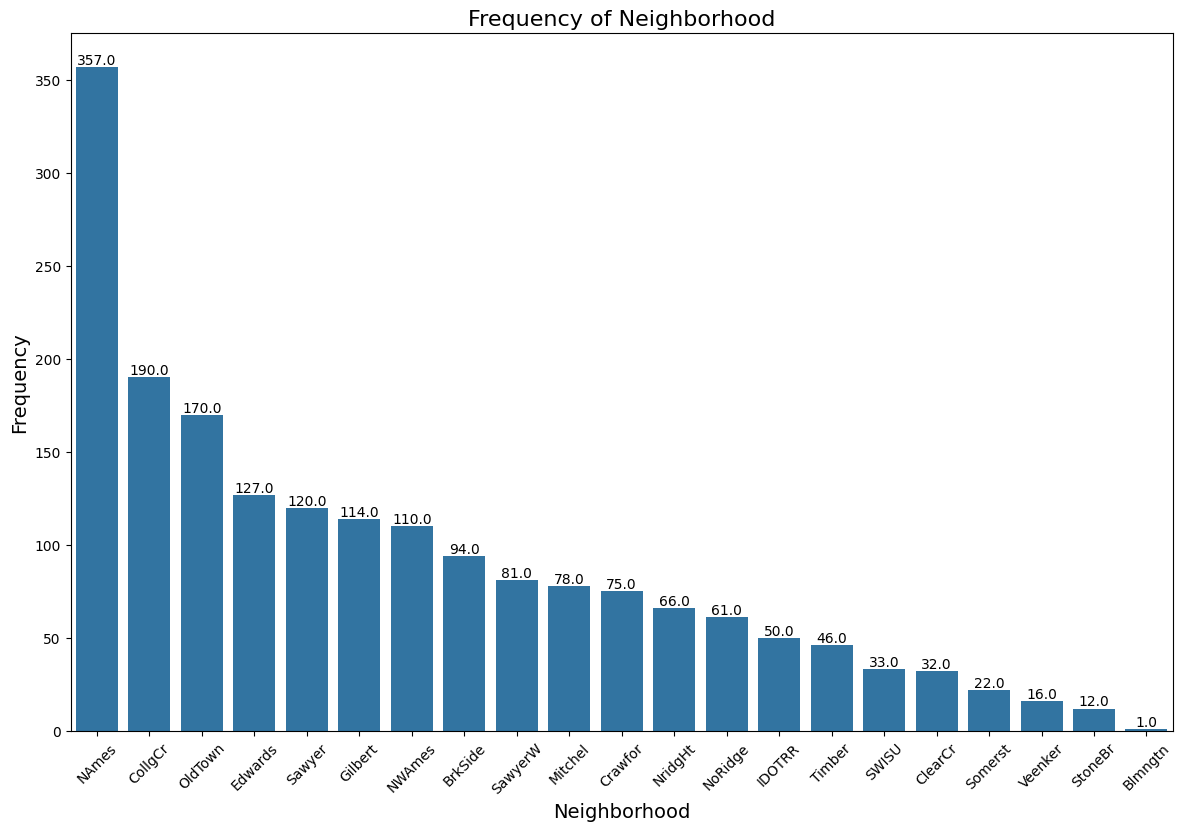

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('Missing')

# Plot bar graph for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    plt.title(f'Frequency of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.tight_layout()
    plt.xticks(rotation=45)

    # Annotate bars with frequency values
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                           textcoords='offset points')

    plt.show()

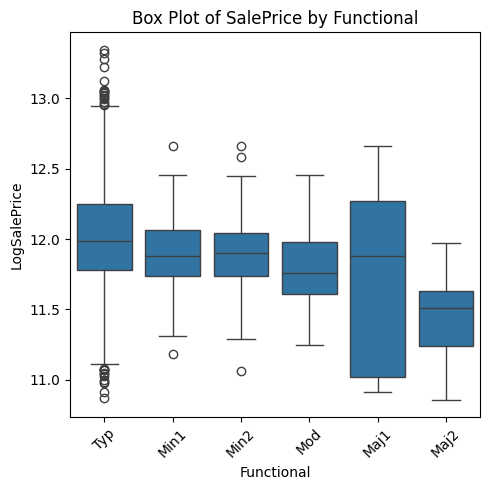

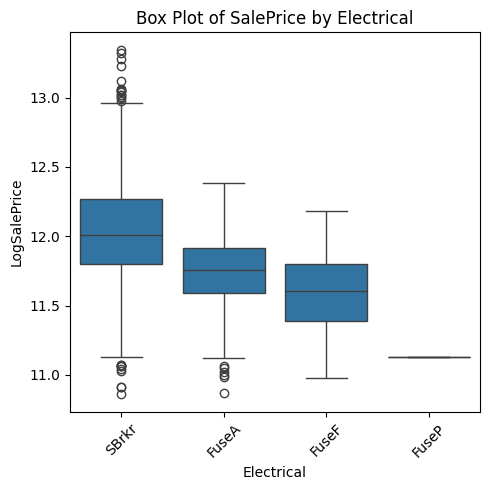

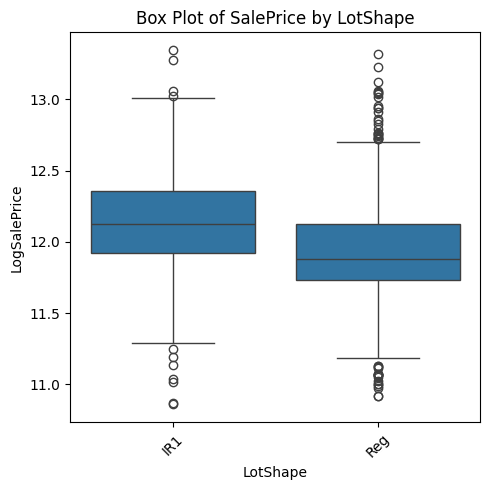

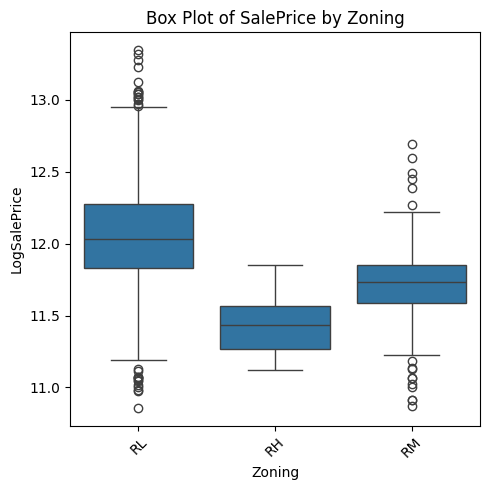

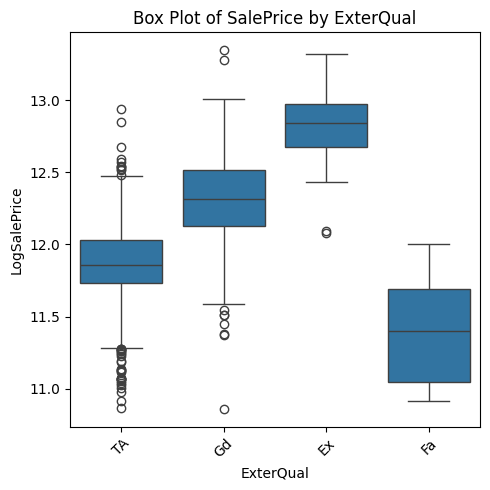

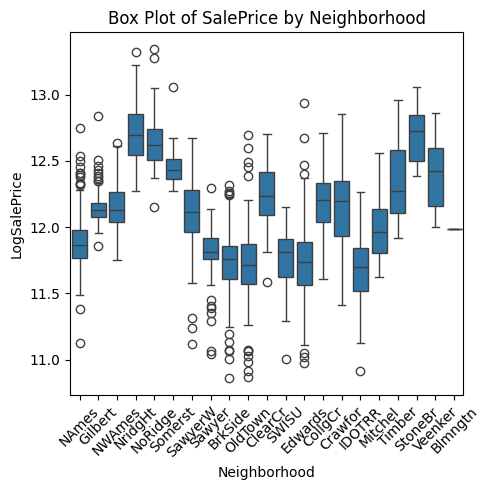

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Replace missing values in categorical columns with 'Missing'
data[categorical_columns] = data[categorical_columns].fillna('Missing')

# Loop through each categorical column
for column in categorical_columns:
    # Create a figure and axis
    plt.figure(figsize=(5,5))

    # Plot boxplot for each category in the column against 'SalePrice'
    sns.boxplot(x=column, y='LogSalePrice', data=data)

    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('LogSalePrice')
    plt.title(f'Box Plot of SalePrice by {column}')

    # Show plot
    plt.tight_layout()
    plt.show()

In [ ]:
# Select only numerical columns excluding SalePrice
numerical_data = data.select_dtypes(include=['int64', 'float64']).drop(columns=['SalePrice'])

# Calculate correlation with LogSalePrice for numerical variables
numerical_corr = numerical_data.corr()['LogSalePrice'].abs().sort_values(ascending=False)

# Select top 3 numerical variables
top_numerical_vars = numerical_corr[0:3].index.tolist()  # Exclude LogSalePrice itself


# Select top 3 numerical variables
top_numerical_vars = numerical_corr[1:4].index.tolist()  # Exclude LogSalePrice itself

# Perform ANOVA test for categorical variables
categorical_vars = ['Functional', 'Electrical', 'LotShape', 'Zoning', 'ExterQual', 'Neighborhood']
anova_results = {}
for cat_var in categorical_vars:
    groups = []
    for category in data[cat_var].unique():
        groups.append(data[data[cat_var] == category]['LogSalePrice'])
    f_statistic, p_value = f_oneway(*groups)
    anova_results[cat_var] = p_value

# Select top 3 categorical variables with lowest p-values
top_categorical_vars = sorted(anova_results, key=anova_results.get)[:3]

# Combine selected variables
selected_vars = top_numerical_vars + top_categorical_vars
print("Selected variables:", selected_vars)


Selected variables: ['OverallQual', 'GrLivArea', 'TotalBath', 'Neighborhood', 'ExterQual', 'Zoning']


In [ ]:
# Calculate correlation matrix for all numerical variables
numerical_corr_matrix = numerical_data.corr()

# Set the diagonal and upper triangle values to NaN to only consider lower triangle
np.fill_diagonal(numerical_corr_matrix.values, np.nan)

# Find the variables with low inter-correlation but high correlation with LogSalePrice
correlation_with_log_saleprice = numerical_corr_matrix['LogSalePrice'].abs()
inter_correlation = numerical_corr_matrix.abs().sum() - correlation_with_log_saleprice

# Select variables with low inter-correlation and high correlation with LogSalePrice
selected_variables = inter_correlation[inter_correlation == inter_correlation.min()].sort_values(ascending=False).index.tolist()[:3]
selected_variables

['LotFrontage']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OverallQual     1855 non-null   int64  
 1   GrLivArea       1855 non-null   int64  
 2   TotalBath       1855 non-null   int64  
 3   GarageCars      1855 non-null   int64  
 4   GarageArea      1855 non-null   int64  
 5   TotalBsmtSF     1855 non-null   int64  
 6   KitchenQual     1855 non-null   int64  
 7   TotRmsAbvGrd    1855 non-null   int64  
 8   HouseAge1       1855 non-null   int64  
 9   SubClass        1855 non-null   int64  
 10  LotFrontage     1855 non-null   float64
 11  WeatherControl  1855 non-null   int64  
 12  Functional      1855 non-null   object 
 13  Electrical      1855 non-null   object 
 14  LotShape        1855 non-null   object 
 15  Zoning          1855 non-null   object 
 16  ExterQual       1855 non-null   object 
 17  Neighborhood    1855 non-null   o

In [ ]:
data.Neighborhood.value_counts()

Neighborhood
NAmes      357
CollgCr    190
OldTown    170
Edwards    127
Sawyer     120
Gilbert    114
NWAmes     110
BrkSide     94
SawyerW     81
Mitchel     78
Crawfor     75
NridgHt     66
NoRidge     61
IDOTRR      50
Timber      46
SWISU       33
ClearCr     32
Somerst     22
Veenker     16
StoneBr     12
Blmngtn      1
Name: count, dtype: int64

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Assuming 'data' contains your dataset with both numerical and categorical columns

# Separate features (X) and target variable (y)
X = data.drop(['LogSalePrice'], axis=1)
y = data['LogSalePrice']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Initialize linear regression model and RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=1)

# Initialize variables to store results
max_r_squared = -1
selected_features = []

# Perform backward selection
for i in range(len(X_encoded.columns), 0, -1):
    # Fit RFE to the data
    rfe.fit(X_encoded, y)

    # Get the selected features
    selected = X_encoded.columns[rfe.support_]

    # Fit the model with selected features
    model.fit(X_encoded[selected], y)

    # Predict target variable
    y_pred = model.predict(X_encoded[selected])

    # Calculate R-squared value
    r_squared = r2_score(y, y_pred)

    # Update maximum R-squared value and selected features
    if r_squared > max_r_squared:
        max_r_squared = r_squared
        selected_features = selected
    else:
        break

# Print the selected features and maximum R-squared value
print("Selected Features:", selected_features)
print("Maximum R-squared Value:", max_r_squared)


Selected Features: Index(['Neighborhood_NridgHt'], dtype='object')
Maximum R-squared Value: 0.13911612886144953


In [ ]:
import pandas as pd

X = data[['GrLivArea', 'OverallQual', 'TotalBath', 'GarageCars','GarageArea','TotalBsmtSF','KitchenQual', 'TotRmsAbvGrd', 'SubClass', 'HouseAge1', 'LotFrontage', 'WeatherControl']]
y = data['LogSalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


X_with_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_const).fit()

# Get the summary of the model
summary = model.summary()

# Print the summary
print(summary)

Mean Squared Error: 0.01243258370029739
                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1339.
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        11:39:15   Log-Likelihood:                 1362.2
No. Observations:                1855   AIC:                            -2698.
Df Residuals:                    1842   BIC:                            -2627.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons

In [ ]:
import pandas as pd

X = data[['GrLivArea', 'OverallQual', 'TotalBath', 'GarageCars','GarageArea','TotalBsmtSF','KitchenQual', 'TotRmsAbvGrd', 'SubClass', 'HouseAge1', 'LotFrontage', 'WeatherControl']]
y = data['LogSalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


X_with_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_const).fit()

# Get the summary of the model
summary = model.summary()

# Print the summary
print(summary)

Mean Squared Error: 0.01243258370029739
                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1339.
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        11:39:15   Log-Likelihood:                 1362.2
No. Observations:                1855   AIC:                            -2698.
Df Residuals:                    1842   BIC:                            -2627.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons